In our journey of the data science lifecycle, we have begun to explore the vast world of exploratory data analysis. More recently, we learned how to pre-process data using various data manipulation techniques. As we work towards understanding our data, there is one key component missing in our arsenal - the ability to visualize and discern relationships in existing data.

These next two lectures will introduce you to various examples of data visualizations and their underlying theory. In doing so, we'll motivate their importace in real-world examples with the use of plotting libraries.

### Visualizations in Data 8 and Data 100 (so far)

You've likely encountered several forms of data visualizations in your studies. You may remember two such examples from Data 8: line charts and histograms. Each of these served a unique purpose. For example, line charts displayed how numerical quantities changed over time, while histograms were useful in understanding a variable's distribution. 

:::: {.columns}

::: {.column width="30%"}
**Line Chart**

<img src="images/line_chart_viz.png" alt='line_chart_viz' width='300'>
:::

::: {.column width="20%"}
<!-- empty column to create gap -->
:::

::: {.column width="30%"}
**Histogram**

<img src="images/histogram_viz.png" alt='histogram_viz' width='400'>
:::

::::

### Goals of Visualization

Visualizations are useful for a number of reasons. In Data 100, we consider two areas in particular:

1. To broaden your understanding of the data
    - Key part in exploratory data analysis
    - Useful in investigating relationships between variables
2. To communicate your results to others
    - Visualization theory is especially important here

One of the most common applications of visualizations - and the one that will be covered today - is in understanding a distribution of data.

### An Overview of Distributions

A distribution describes the frequency of unique values in a variable. Distributions must satisfy two properties:

   1. Each data point must belong to only one category.
   2. The total frequency of all categories must sum to 100%. In other words, their total count should equal the number of values in consideration.
   
Let's look at a couple of examples.

:::: {.columns}

::: {.column width="30%"}
**Not a Valid Distribution**

<img src="images/bad_distro.png" alt='bad_distro' width='300'>
:::

::: {.column width="20%"}
<!-- empty column to create gap -->
:::

::: {.column width="30%"}
**Valid Distribution**

<img src="images/good_distro.png" alt='good_distro' width='400'>
:::

::::

Left Diagram: This is not a valid distribution. Individuals can belong to more than one category and the total frequency of all categories does not sum up to 100%. 

Right Diagram: This example satisfies the two properties of distributions, so it is a valid distribution.

### Bar Plots

As we saw above, **bar plots** are one of the most common ways of displaying the distribution of a **qualitative** (categorical) variable. The length of a bar plot encodes the frequency of a category; the width encodes no useful information.

Let's contextualize this in an example. We will use the familiar `births` dataset from Data 8 in our analysis.

In [14]:
#| code-fold: true
import pandas as pd

births = pd.read_csv("data/baby.csv")
births.head(5)

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


We can visualize the distribution of the `Maternal Smoker` column using a bar plot. There are a few ways to do this.

#### Plotting in Pandas

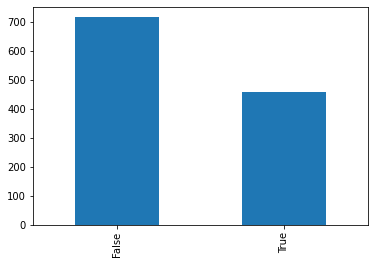

In [15]:
births['Maternal Smoker'].value_counts().plot(kind = 'bar');

Recall that `.value_counts()` returns a Series with the total count of each unique value. We call `.plot(kind = 'bar')` on this result to visualize these counts as a bar plot.

Plotting methods in `pandas` are the least preferred and not supported in Data 100, as their functionality is limited. Instead, future examples will focus on other libaries built specifically for visualizing data. The most well-known library here is `matplotlib`.

#### Plotting in Matplotlib

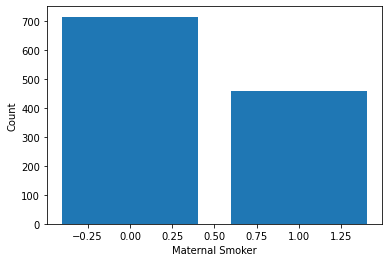

In [63]:
import matplotlib.pyplot as plt


ms = births['Maternal Smoker'].value_counts()
plt.bar(ms.index, ms)
plt.xlabel("Maternal Smoker")
plt.ylabel("Count");

While more code is required to achieve the same result, `matplotlib` is often used over `pandas` for its ability to plot more complex visualizations, some of which are discussed shortly.

However, notice how the x-axis is a range of integers rather than the two categories, `True` and `False`. This is because `matplotlib` coerces `True` to a value of 1 and `False` to 0. Also, note how we needed to label the axes with `plt.xlabel` and `plt.ylabel` - `matplotlib` does not support automatic axis labeling. To get around these inconveniences, we can use a more effecient plotting library, `seaborn`.

#### Plotting in Seaborn

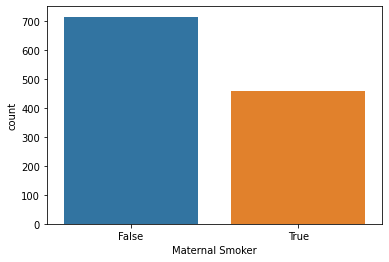

In [17]:
import seaborn as sns
sns.countplot(data = births, x = "Maternal Smoker");

`seaborn.countplot` both counts and visualizes the number of unique values in a given column. This column is specified by the `x` argument to `sns.countplot`, while the DataFrame is specified by the `data` argument.

For the vast majority of visualizations, `seaborn` is far more concise and aesthetically pleasing than `matplotlib`. However, the color scheme of this particular bar plot is abritrary - it encodes no additional information about the categories themselves. This is not always true; color may signify meaningful detail in other visualizations. We'll explore this more in-depth during the next lecture.

#### Plotting in Plotly

<img src="/visualization_1_files/plotly_viz.png" alt='plotly_viz' width='600'>

`plotly` is one of the most versatile plottling libraries and widely used in industry. However, `plotly` has various dependencies that make it difficult to support in Data 100. Therfore, we have intentionally excluded the code to generate the plot above.

By now, you'll have noticed that each of these plotting libraries have a very different syntax. As with `pandas`, we'll teach you the important methods in `matplotlib` and `seaborn`, but you'll learn more through documentation.

1. [Matplotlib Documentation](https://matplotlib.org/stable/index.html)
2. [Seaborn Documentation](https://seaborn.pydata.org/)


## Introspection

Plots are a tool you will be using constantly throughout the data science life-cycle. Remember to always keep in mind the 2 goals of data visualization in mind when plotting. 


Goal 1: To help your own understanding of your data/results.
- Key part of exploratory data analysis.
- Useful throughout modeling as well.
- Lightweight, iterative and flexible.

Goal 2: To communicate results/conclusions to others.
- Highly editorial and selective. 
- Be thoughtful and careful!
- Fine tuned to achieve a communications goal.
- Often time-consuming: bridges into design, even art.


The out-of-the-box plots may not accomplish these goals, and knowing how to critically evaluate plots is an important skill. Let's revisit a plot and try and improve it to achieve the goals.


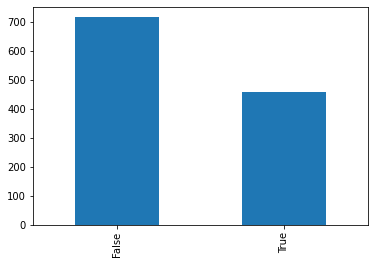

In [18]:
births['Maternal Smoker'].value_counts().plot(kind = 'bar');

Example Questions:
- What colors should we use?
- How wide should the bars be?
- Should the legend exist?
- Should the bars and axes have dark borders?

To accomplish goal 2, here are some ways we can improve plot:
- Introducing different colors for each bar
- Including a legend
- Including a title
- Labeling the y-axis
- Using color-blind friendly palettes
- Reorienting the labels
- Increase the font size
 
<img src="images/example_smokers.png" alt='example_smokers' width='500'>



### Histograms

**Histograms** are a natural extension to bar plots; they visualize the distribution of **quantitative** (numerical) data.

Revisiting our example with the `births` DataFrame, let's plot the distribution of the `Maternal Pregnancy Weight` column.

In [19]:
#| code-fold: true
births.head(5)

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


How should we define our categories for this variable? In the previous example, these were the unique values of the `Maternal Smoker` column: `True` and `False`. If we use similar logic here, our categories are the different numerical weights contained in the `Maternal Pregnancy Weight` column.

Under this assumption, let's plot this distribution using the `seaborn.countplot` function.

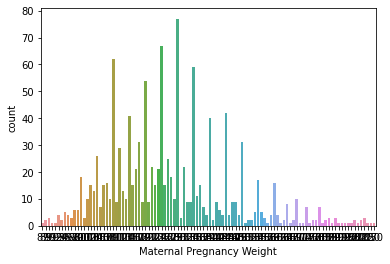

In [20]:
sns.countplot(data = births, x = 'Maternal Pregnancy Weight');

This histogram clearly suffers from overplotting. This is somewhat expected for `Maternal Pregnancy Weight` - it is a quantitative variable that takes on a wide range of values.

To combat this problem, statisticians use bins to categorize numerical data. Luckily, `seaborn` provides a helpful plotting function that automatically bins our data.

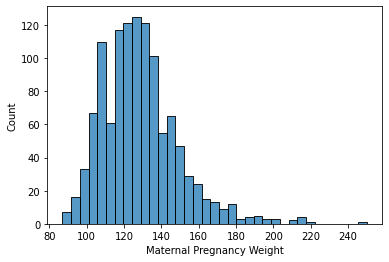

In [21]:
sns.histplot(data = births, x = "Maternal Pregnancy Weight");

This diagram is known as a histogram. While it looks more reasonable, notice how we lose fine-grain information on the distribution of data contained within each bin. We can introduce rug plots to minimize this information loss. An overlaid "rug plot" displays the within-bin distribution of our data, as denoted by the thickness of the colored line on the x-axis.

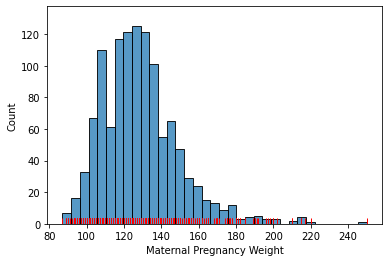

In [22]:
sns.histplot(data = births, x = "Maternal Pregnancy Weight");
sns.rugplot(data = births, x = "Maternal Pregnancy Weight", color = 'red');

You may have seen histograms drawn differently - perhaps with an overlaid **density curve** and normalized y-axis. We can display both with a few tweaks to our code. 

To visualize a density curve, we can set the the `kde = True` argument of the `sns.histplot`. Setting the argument `stat = "density"` normalizes our histogram and displays densities, instead of counts, on the y-axis. You'll notice that the area under the density curve is 1.

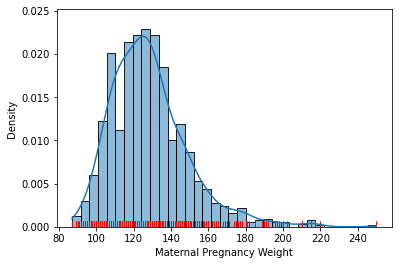

In [23]:
sns.histplot(data = births, x = "Maternal Pregnancy Weight", kde = True, 
             stat = "density")
sns.rugplot(data = births, x = "Maternal Pregnancy Weight", color = 'red');

### Evaluating Histograms

Histograms allow us to assess a distribution by their shape. There are a few properties of histograms we can analyze:

1. Skewness and Tails
    - Skewed left vs skewed right
    - Left tail vs right tail
2. Outliers
    - Defined arbitrarily for now
3. Modes
    - Most commonly occuring data

#### Skewness and Tails

If a distribution has a long right tail (such as `Maternal Pregancy Weight`), it is **skewed right**. In a right-skewed distribution, the few large outliers "pull" the mean to the **right** of the median.

If a distribution has a long left tail, it is **skewed left**. In a left-skewed distribution, the few small outliers "pull" the mean to the **left** of the median. 

In the case where a distribution has equal-sized right and left tails, it is **symmetric**. The mean is approximately **equal** to the median.

Think of the mean as the “balancing point” of the density.

The mean is: 128.4787052810903 and the median is 125.0


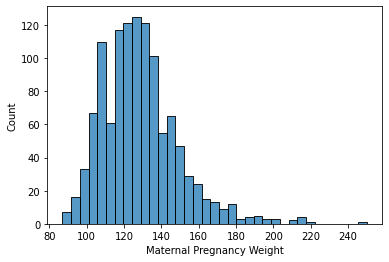

In [45]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight');
df_mean = np.mean(births["Maternal Pregnancy Weight"])
df_median = np.median(births["Maternal Pregnancy Weight"])
print("The mean is: {} and the median is {}".format(df_mean,df_median))

#### Outliers

Loosely speaking, an **outlier** is defined as a data point that lies an abnormally large distance away from other values. We'll define the statistical measure for this shortly.

Outliers disproportionately influce the mean because their magnitude is directly involved in computing the average. However, the median is largely unaffected - the magnitude of an outlier is irrelevant; we only care that it is some non-zero distance away from the midpoint of the data.

Will define outliers more carefully later when we talk about box plots.


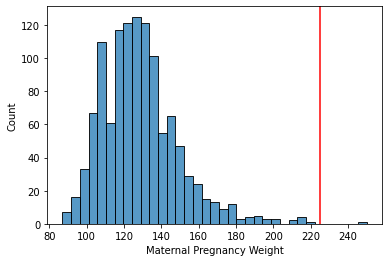

In [58]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight');
## Where do we draw the line of outlier? 
plt.axvline(df_mean*1.75, color = "red")

#### Modes

A **mode** of a distribution is a local or global maximum. A distribution with a single clear maximum is **unimodal**, distributions with two modes are **bimodal**, and those with 3 or more are **multimodal**.

- Need to distinguish between **modes** and *random noise*.

For example, the distribution of birth weights for maternal smokers looks (weakly) multimodal.

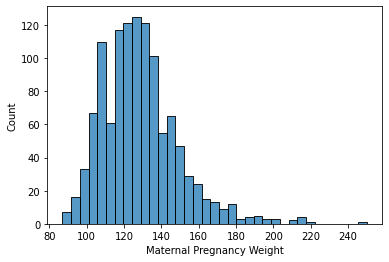

In [39]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight');

However, changing the bins reveals that the data is not multimodal.

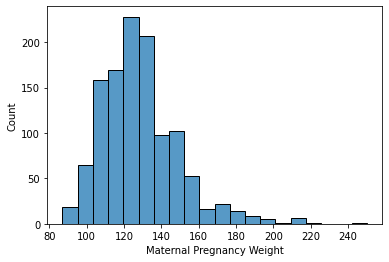

In [40]:
sns.histplot(data = births, x = 'Maternal Pregnancy Weight', bins = 20);

#### Density Curves

Instead of a discrete histogram, we can visualize what a continuous distribution corresponding to that same data could look like using a curve.
- The smooth curve drawn on top of the histogram here is called a density curve.

In lecture 8, we will study how exactly to compute these density curves (using a technique is called Kernel Density Estimation). 

If we plot `birth weights` of babies of *smoking mothers*, we get a histogram that appears bimodal.
- Density curve reinforces belief in this bimodality.

However, if we plot `birth weights` of babies of *non-smoking mothers*, we get a histogram that appears unimodal.

From a goal 1 perspective, this is EDA which tells us there may be something interesting here worth pursuing.
- Deeper analysis necessary!
- If we found something truly interesting, we’d have to cautiously write up an argument and create goal 2 level visualizations.


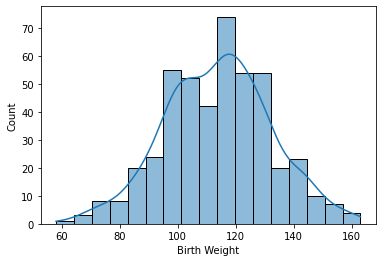

In [67]:
births_non_maternal_smoker = births[births['Maternal Smoker'] == False]
births_maternal_smoker = births[births['Maternal Smoker'] == True]
 
sns.histplot(data = births_maternal_smoker , x= 'Birth Weight',kde = True);

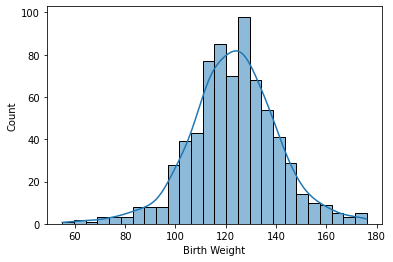

In [68]:
sns.histplot(data = births_non_maternal_smoker , x= 'Birth Weight',kde = True);

#### Histograms and Density

Rather than labeling by counts, we can instead plot the density, as shown below. Density gives us a measure that is invariant to the total number of observed units. The numerical values on the Y-axis for a sample of 100 units would be the same for when we observe a sample of 10000 units instead. We can still calculate the absolute number of observed units using density.

Example: There are 1174 observations total.
- Total area of this bin should be: 120/1174  = ~10%
- Density of this bin is therefore: 10% / (115 - 110) = 0.02

<img src="images/example_density.png" alt='example_density.png' width='500'>



### Box Plots and Violin Plots

#### Boxplots

**Boxplots** are an alternative to histograms that visualize numerical distributions. They are especially useful in graphicaly summarizing several characteristics of a distribution. These include:

1. Lower Quartile ($1$^st^ Quartile)
2. Median ($2$^nd^ Quartile)
3. Upper Quartile ($3$^rd^ Quartile)
4. Interquartile Range (IQR)
5. Whiskers
6. Outliers

The **lower quartile**, **median**, and **uper quartile** are the $25$^th^, $50$^th^, and $75$^th^ percentiles of data, respectively. The **interquartile range** measures the spread of the middle $50$% of the distribution, calculated as the ($3$^rd^ Quartile $-$ $1$^st^ Quartile).

The **whiskers** of a box-plot are the two points that lie at the $1$^st^ Quartile $-$ ($1.5$ * IQR), and the $3$^rd^ Quartile $+$ ($1.5$ * IQR). They are the lower and upper ranges of "normal" data (the points excluding outliers). Subsequently, the **outliers** are the data points that fall beyond the whiskers, or further than ($1.5$ $*$ IQR) from the extreme quartiles.

Let's visualize a box-plot of the `Birth Weight` column.

The first quartile is 108.0
The second quartile is 120.0
The third quartile is 131.0
The interquartile range is 23.0
The whiskers are 73.5 and 165.5


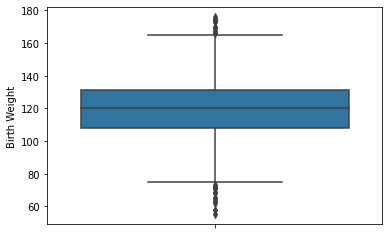

In [26]:
#| code-fold: true

import numpy as np

sns.boxplot(data = births, y = "Birth Weight");

bweights = births['Birth Weight']
q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - (1.5 * iqr)
whisk2 = q3 + (1.5 * iqr)

print("The first quartile is {}".format(q1))
print("The second quartile is {}".format(q2))
print("The third quartile is {}".format(q3))
print("The interquartile range is {}".format(iqr))
print("The whiskers are {} and {}".format(whisk1, whisk2))

Here is a helpful visual that summarizes our discussion above.

<img src="images/box-plot_vis.png" alt='box-plot_vis' width='500'>

#### Violin Plots

Another diagram that is useful in visualizing a variable's distribution is the violin plot. A **violin plot** supplements a box-plot with a smoothed density curve on either side of the plot. These density curves highlight the relative frequency of variable's possible values. If you look closely, you'll be able to discern the quartiles, whiskers, and other hallmark features of the box-plot.

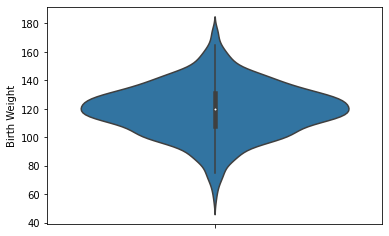

In [27]:
sns.violinplot(data = births, y = 'Birth Weight');

### Comparing Quantitative Distributions

Earlier in our discussion of the mode, we visualized two histograms that described the distribution of birth weights for maternal smokers and non-smokers. However, comparing these histograms was difficult because they were displayed on seperate plots. Can we overlay the two to tell a more compelling story?

In `seaborn`, multiple calls to a plotting library in the same code cell will overlay the plots. For example:

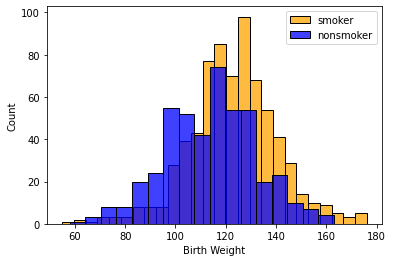

In [61]:


sns.histplot(data = births_maternal_smoker, x= 'Birth Weight',
             color = 'orange', label = 'smoker')
sns.histplot(data = births_non_maternal_smoker, x= 'Birth Weight',
             color = 'blue', label = 'nonsmoker')
plt.legend();

However, notice how this diagram suffers from overplotting. We can fix this with a call to `sns.kdeplot`. This will remove the bins and overlay the histogram with a density curve that better summarizes the distribution.

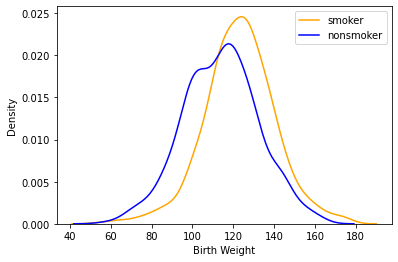

In [29]:
sns.kdeplot(data = births_maternal_smoker, x= 'Birth Weight', color = 'orange', label = 'smoker')
sns.kdeplot(data = births_non_maternal_smoker, x= 'Birth Weight', color = 'blue', label = 'nonsmoker')
plt.legend();

Unfortunately, we lose critical information in our distribution by removing small details. Therefore, we typically prefer to use box-plots and violin plots when comparing distributions. These are more concise and allow us to compare summary statistics across many distributions.

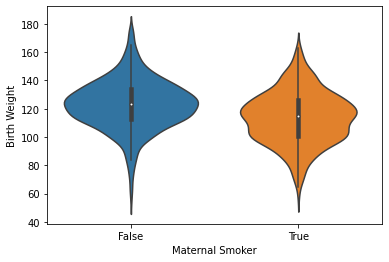

In [30]:
sns.violinplot(data=births, x='Maternal Smoker', y='Birth Weight');
# The following line of code plots a box-plot
#sns.boxplot(data=births, x='Maternal Smoker', y='Birth Weight');

#### Ridge Plots
Ridge plots show many density curves offset from one another with minimal overlap.
- They are useful when the specific shape of each curve is important.

<img src = ".\images\example_ridge.png" alt ="example_ridge.png" ></img>

### Relationships Between Quantitative Variables

Up until now, we've discussed how to visualize single-variable distributions. Going beyond this, we want to understand the relationship between pairs of numerical variables.

#### Scatter Plots

**Scatter plots** are one of the most useful tools in representing the relationship between two quantitative variables. They are particularly important in gauging the strength, or correlation between variables. Knowledge of these relationships can then motivate decisions in our modeling process.

For example, let's plot a scatter plot comparing the `Maternal Pregnancy Weight` and `Birth Weight` colums, using both `matplotlib` and `seaborn`.

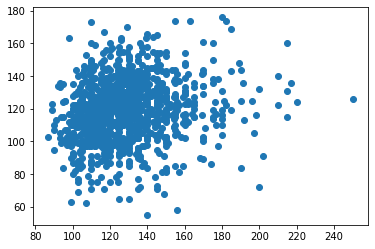

In [31]:
# Matplotlib Example
plt.scatter(births['Maternal Pregnancy Weight'], births['Birth Weight'])
# For brevity, we have excluded code to label the axes

<AxesSubplot:xlabel='Maternal Pregnancy Weight', ylabel='Birth Weight'>

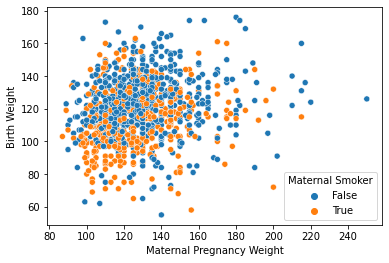

In [32]:
# Seaborn Example
sns.scatterplot(data = births, x = "Maternal Pregnancy Weight", y = "Birth Weight",
                hue = "Maternal Smoker")

This is an example where color is used to add a third dimension to our plot. This is possible with the `hue` paramater in `seaborn`, which adds a categorical column encoding to an existing visualization. This way, we can look for relationships in `Maternal Pregnancy Weight` and `Birth Weight` in both maternal smokers and non-smokers. If we wish to see the relationship's strength more clearly, we can use `sns.lmplot`.

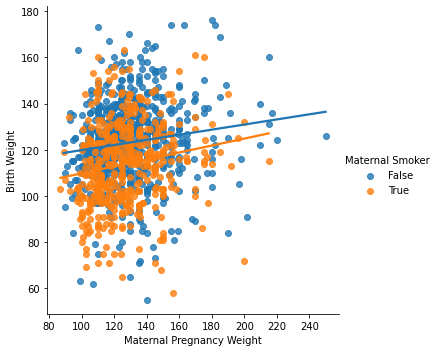

In [33]:
sns.lmplot(data = births, x = "Maternal Pregnancy Weight", y = "Birth Weight", 
           hue="Maternal Smoker", ci=False);

We can make out a weak, positive relationship in pregnancy weight and birth weight for both maternal smokers and non-smokers (slightly more positive in maternal smokers).

#### Hex Plots and Contour Plots

Unfortunately, our scatter plots above suffered from overplotting, which made them hard to interpret. And with a large number of points, jittering is unlikely to resolve the issue. Instead, we can look to hex plots and contour plots.

**Hex Plots** can be thought of as a two dimensional histogram that shows the joint distribution between two variables. This is particularly useful working with very dense data. 

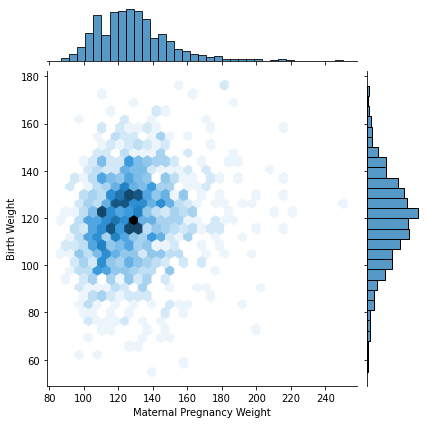

In [34]:
sns.jointplot(data = births, x = "Maternal Pregnancy Weight", 
              y = "Birth Weight", kind = 'hex')

The axes are evidently binned into hexagons, which makes the linear relationship easier to decipher. Darker regions generally indicate a higher density of points.

On the other hand, **contour plots** are two dimensional versions of density curves with marginal distributions of each variable on the axes. We've used very similar code here to generate our contour plots, with the addition of the `kind = 'kde'` and `fill = True` arguments.

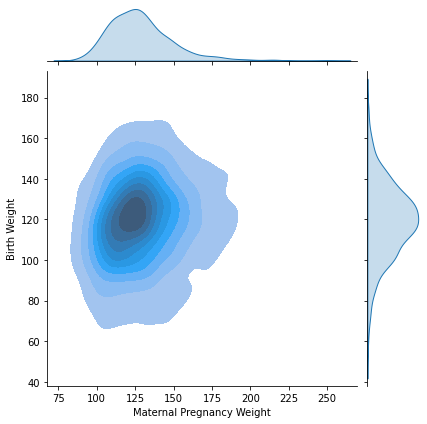

In [35]:
sns.jointplot(data = births, x = "Maternal Pregnancy Weight", 
              y = "Birth Weight", kind = 'kde', fill = True)